In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# entire network of movies and actors
file = open('movie-actor.txt', encoding="utf8")
content = file.readlines()

movieGraph = nx.Graph()

# starter code
for row in content:
   cleanRow = row.strip('\n').split('/')
   for i in range(1,len(cleanRow)):
      for j in range(1,len(cleanRow)):
          if i<j:
             if movieGraph.has_edge(cleanRow[i],cleanRow[j])==False:
                      movieGraph.add_edge(cleanRow[i],cleanRow[j], weight=1)
             else:
                      movieGraph[cleanRow[i]][cleanRow[j]]['weight'] = movieGraph[cleanRow[i]][cleanRow[j]]['weight']+1

# removes the connection between actors if the same two actors haven't starred in at least 5 movies together
for (u, v) in movieGraph.edges():
  if movieGraph.edges[u,v]['weight'] < 5:
    movieGraph.remove_edge(u, v)

In [ ]:
nx.is_connected(movieGraph)

False

In [ ]:
nx.info(movieGraph)

'Graph with 21143 nodes and 147 edges'

In [ ]:
# finds the largest part of the entire network (following the removal of actors who has starred in fewer than 5 movies together) 
#where all of the actors have starred in 
group=list(nx.connected_components(movieGraph))
group
biggestDict = max(group, key=len)
len(biggestDict)

26

In [ ]:
subgraph = movieGraph.subgraph(biggestDict)

In [ ]:
# identifies all the actors who have starred in the same movies together
connected_actors = list(subgraph.edges())
connected_actors

[('Allwine, Wayne', 'Farmer, Bill (I)'),
 ('Allwine, Wayne', 'Anselmo, Tony'),
 ('Ranft, Joe', 'Farmer, Bill (I)'),
 ('Ranft, Joe', 'Stanton, Andrew (I)'),
 ('Ranft, Joe', 'Angel, Jack (I)'),
 ('Ranft, Joe', 'Rabson, Jan'),
 ('Ranft, Joe', 'Ratzenberger, John'),
 ('Ranft, Joe', 'Lynn, Sherry (I)'),
 ('Ranft, Joe', 'McGowan, Mickie'),
 ('Pinney, Patrick', 'Proctor, Phil'),
 ('Pinney, Patrick', 'Angel, Jack (I)'),
 ('Pinney, Patrick', 'Welker, Frank'),
 ('Pinney, Patrick', 'Lynn, Sherry (I)'),
 ('Pinney, Patrick', 'Darling, Jennifer'),
 ('Pinney, Patrick', 'McGowan, Mickie'),
 ('Stanton, Andrew (I)', 'Ratzenberger, John'),
 ('Harnell, Jess', 'Bergen, Bob'),
 ('Derryberry, Debi', 'Proctor, Phil'),
 ('Derryberry, Debi', 'Angel, Jack (I)'),
 ('Derryberry, Debi', 'Lynn, Sherry (I)'),
 ('Derryberry, Debi', 'McGowan, Mickie'),
 ('Derryberry, Debi', 'Bumpass, Rodger'),
 ('Derryberry, Debi', 'Bergen, Bob'),
 ('Derryberry, Debi', 'Farmer, Bill (I)'),
 ('Angel, Jack (I)', 'Proctor, Phil'),
 ('Ange

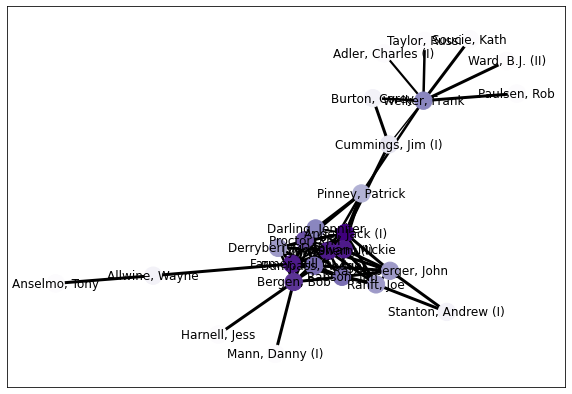

In [ ]:
node_color = [subgraph.degree(v) for v in subgraph] 
edge_width = [15 * (1.0/subgraph[u][v]['weight']) for u, v in subgraph.edges()] 
pos = nx.spring_layout(subgraph)

plt.figure(figsize=(10,7))
nx.draw_networkx(subgraph, pos, with_labels=True, node_color=node_color, cmap=plt.cm.Purples, width=edge_width)

In [ ]:
print(nx.info(subgraph))

degrees = [value for key, value in subgraph.degree]
print("Average Degree:", np.mean(degrees))

Graph with 26 nodes and 74 edges
Average Degree: 5.6923076923076925


In [ ]:
print(nx.adjacency_matrix(subgraph).todense())

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  5  0  0  0
   0  0]
 [ 0  0  0  5  0  0  5  0  0  0  0  0  5  0  0  0  0  0  0  0  5  0  0  5
   5  6]
 [ 0  0  0  0  0  0  6  0  0  0  5  0  6  5  0  0  0  6  0  0  0  0  0  0
   7  0]
 [ 0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  5]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0
   0  0]
 [ 0  0  0  0  0  0  6  0  0  0  7  0  8  0  0  5  0  0  0  0  5  6  0  0
   6  0]
 [ 0  5  6  0  0  6  0  5  0  0  8  0 10  8  0  6  0  0  0  0  7  6  0  6
  11  5]
 [ 0  0  0  0  0  0  5  0  0  5  0  0  0  0  0  0  0 11  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0
   0  0]
 [ 0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  6  0  0  0  0  0  0
   0  0]
 [ 0  0  5  0  0  7  8  0  0  0  0  0  9  6  0  6  0  0  0  0  7  6  0  5
   8  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0
   0  0]
 [ 0

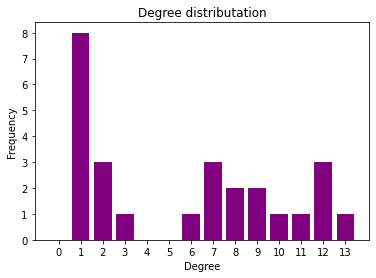

In [ ]:
# code from Graph Mining v4
y_axis = nx.degree_histogram(subgraph)
x_axis = list(range(0, len(y_axis)))
plt.bar(x_axis, y_axis, color = 'purple')

plt.xticks(x_axis)
plt.yticks(list(range(0, max(y_axis)+1)))

plt.title('Degree distributation')
plt.xlabel('Degree')
plt.ylabel('Frequency')
 
plt.show()

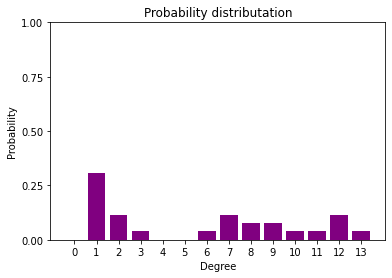

In [ ]:
# code from Graph Mining v4
degrees = nx.degree_histogram(subgraph)
y_axis =  [i/sum(degrees) for i in degrees]
x_axis = list(range(0, len(y_axis)))
plt.bar(x_axis, y_axis, color = 'purple')

plt.xticks(x_axis)
plt.yticks([0.0,0.25,0.5,0.75,1.0])

plt.title('Probability distributation')
plt.xlabel('Degree')
plt.ylabel('Probability')
 
plt.show()

In [ ]:
nx.is_connected(subgraph)

True

In [ ]:
# the network is about actors and how many movies they've starred in with other actors. The graph doesn't have multiple
# natures, so the network is not bipartite.

from networkx.algorithms import bipartite
bipartite.is_bipartite(subgraph)

False

In [ ]:
# the optimal/fastest path to every actor in the network
nx.shortest_path(subgraph)

{'Adler, Charles (I)': {'Adler, Charles (I)': ['Adler, Charles (I)'],
  'Allwine, Wayne': ['Adler, Charles (I)',
   'Welker, Frank',
   'Cummings, Jim (I)',
   'Angel, Jack (I)',
   'Farmer, Bill (I)',
   'Allwine, Wayne'],
  'Angel, Jack (I)': ['Adler, Charles (I)',
   'Welker, Frank',
   'Cummings, Jim (I)',
   'Angel, Jack (I)'],
  'Anselmo, Tony': ['Adler, Charles (I)',
   'Welker, Frank',
   'Cummings, Jim (I)',
   'Angel, Jack (I)',
   'Farmer, Bill (I)',
   'Allwine, Wayne',
   'Anselmo, Tony'],
  'Bergen, Bob': ['Adler, Charles (I)',
   'Welker, Frank',
   'Cummings, Jim (I)',
   'Angel, Jack (I)',
   'Bergen, Bob'],
  'Bumpass, Rodger': ['Adler, Charles (I)',
   'Welker, Frank',
   'Cummings, Jim (I)',
   'Angel, Jack (I)',
   'Bumpass, Rodger'],
  'Burton, Corey': ['Adler, Charles (I)', 'Welker, Frank', 'Burton, Corey'],
  'Cummings, Jim (I)': ['Adler, Charles (I)',
   'Welker, Frank',
   'Cummings, Jim (I)'],
  'Darling, Jennifer': ['Adler, Charles (I)',
   'Welker, Frank',


In [ ]:
nx.average_shortest_path_length(subgraph)

2.5723076923076924

In [ ]:
# the best paths to take from each specific actor to the one specified: Frank Welker
nx.shortest_path_length(subgraph,'Welker, Frank')

{'Adler, Charles (I)': 1,
 'Allwine, Wayne': 4,
 'Angel, Jack (I)': 2,
 'Anselmo, Tony': 5,
 'Bergen, Bob': 3,
 'Bumpass, Rodger': 3,
 'Burton, Corey': 1,
 'Cummings, Jim (I)': 1,
 'Darling, Jennifer': 2,
 'Derryberry, Debi': 3,
 'Farmer, Bill (I)': 3,
 'Harnell, Jess': 4,
 'Lynn, Sherry (I)': 2,
 'Mann, Danny (I)': 4,
 'McGowan, Mickie': 2,
 'Paulsen, Rob': 1,
 'Pinney, Patrick': 1,
 'Proctor, Phil': 2,
 'Rabson, Jan': 3,
 'Ranft, Joe': 3,
 'Ratzenberger, John': 3,
 'Soucie, Kath': 1,
 'Stanton, Andrew (I)': 4,
 'Taylor, Russi': 1,
 'Ward, B.J. (II)': 1,
 'Welker, Frank': 0}

In [ ]:
# longest possible path in the network
nx.diameter(subgraph)

6

In [ ]:
# the largest distance (path) from the specific actor you're looking at
nx.eccentricity(subgraph)

{'Adler, Charles (I)': 6,
 'Allwine, Wayne': 5,
 'Angel, Jack (I)': 3,
 'Anselmo, Tony': 6,
 'Bergen, Bob': 4,
 'Bumpass, Rodger': 4,
 'Burton, Corey': 5,
 'Cummings, Jim (I)': 4,
 'Darling, Jennifer': 3,
 'Derryberry, Debi': 4,
 'Farmer, Bill (I)': 4,
 'Harnell, Jess': 5,
 'Lynn, Sherry (I)': 3,
 'Mann, Danny (I)': 5,
 'McGowan, Mickie': 3,
 'Paulsen, Rob': 6,
 'Pinney, Patrick': 4,
 'Proctor, Phil': 3,
 'Rabson, Jan': 4,
 'Ranft, Joe': 4,
 'Ratzenberger, John': 4,
 'Soucie, Kath': 6,
 'Stanton, Andrew (I)': 5,
 'Taylor, Russi': 6,
 'Ward, B.J. (II)': 6,
 'Welker, Frank': 5}

In [ ]:
# shortest path (minimum actors to pass thru)
nx.radius(subgraph)

3

In [ ]:
nx.periphery(subgraph)

['Adler, Charles (I)',
 'Paulsen, Rob',
 'Taylor, Russi',
 'Anselmo, Tony',
 'Ward, B.J. (II)',
 'Soucie, Kath']

In [ ]:
degrees=subgraph.degree
list(degrees)

[('Burton, Corey', 2),
 ('Adler, Charles (I)', 1),
 ('Paulsen, Rob', 1),
 ('Bumpass, Rodger', 9),
 ('Cummings, Jim (I)', 3),
 ('Angel, Jack (I)', 13),
 ('Mann, Danny (I)', 1),
 ('Ratzenberger, John', 7),
 ('Taylor, Russi', 1),
 ('Derryberry, Debi', 7),
 ('Allwine, Wayne', 2),
 ('Darling, Jennifer', 8),
 ('Proctor, Phil', 10),
 ('Bergen, Bob', 11),
 ('Ranft, Joe', 7),
 ('McGowan, Mickie', 12),
 ('Anselmo, Tony', 1),
 ('Ward, B.J. (II)', 1),
 ('Lynn, Sherry (I)', 12),
 ('Welker, Frank', 8),
 ('Rabson, Jan', 9),
 ('Soucie, Kath', 1),
 ('Harnell, Jess', 1),
 ('Pinney, Patrick', 6),
 ('Farmer, Bill (I)', 12),
 ('Stanton, Andrew (I)', 2)]

In [ ]:
movieGraph.degree('Angel, Jack (I)')    

13

In [ ]:
# the minimum distance, meaning someone who's looking up actors won't have to look through as many movie casts to find
# the actor(s) they're looking for if they look at these 5 people.

# actors w the shortest paths 
nx.center(subgraph)

['Angel, Jack (I)',
 'Darling, Jennifer',
 'Proctor, Phil',
 'McGowan, Mickie',
 'Lynn, Sherry (I)']

In [ ]:
# how strongly connected an actor is to all the other actors in the network (the higher the coefficient, the more
# people they've acted with in this group)
nx.clustering(subgraph)

{'Adler, Charles (I)': 0,
 'Allwine, Wayne': 0,
 'Angel, Jack (I)': 0.5897435897435898,
 'Anselmo, Tony': 0,
 'Bergen, Bob': 0.6,
 'Bumpass, Rodger': 0.9166666666666666,
 'Burton, Corey': 1.0,
 'Cummings, Jim (I)': 0.3333333333333333,
 'Darling, Jennifer': 0.8928571428571429,
 'Derryberry, Debi': 1.0,
 'Farmer, Bill (I)': 0.6363636363636364,
 'Harnell, Jess': 0,
 'Lynn, Sherry (I)': 0.696969696969697,
 'Mann, Danny (I)': 0,
 'McGowan, Mickie': 0.696969696969697,
 'Paulsen, Rob': 0,
 'Pinney, Patrick': 0.6666666666666666,
 'Proctor, Phil': 0.8222222222222222,
 'Rabson, Jan': 0.8333333333333334,
 'Ranft, Joe': 0.7619047619047619,
 'Ratzenberger, John': 0.7619047619047619,
 'Soucie, Kath': 0,
 'Stanton, Andrew (I)': 1.0,
 'Taylor, Russi': 0,
 'Ward, B.J. (II)': 0,
 'Welker, Frank': 0.03571428571428571}

In [ ]:
# on average how connected an actor's neighbors are to each other
nx.average_clustering(subgraph)

0.47094806902499214

In [ ]:
degree_central=nx.degree_centrality(subgraph)
degree_central

{'Adler, Charles (I)': 0.04,
 'Allwine, Wayne': 0.08,
 'Angel, Jack (I)': 0.52,
 'Anselmo, Tony': 0.04,
 'Bergen, Bob': 0.44,
 'Bumpass, Rodger': 0.36,
 'Burton, Corey': 0.08,
 'Cummings, Jim (I)': 0.12,
 'Darling, Jennifer': 0.32,
 'Derryberry, Debi': 0.28,
 'Farmer, Bill (I)': 0.48,
 'Harnell, Jess': 0.04,
 'Lynn, Sherry (I)': 0.48,
 'Mann, Danny (I)': 0.04,
 'McGowan, Mickie': 0.48,
 'Paulsen, Rob': 0.04,
 'Pinney, Patrick': 0.24,
 'Proctor, Phil': 0.4,
 'Rabson, Jan': 0.36,
 'Ranft, Joe': 0.28,
 'Ratzenberger, John': 0.28,
 'Soucie, Kath': 0.04,
 'Stanton, Andrew (I)': 0.08,
 'Taylor, Russi': 0.04,
 'Ward, B.J. (II)': 0.04,
 'Welker, Frank': 0.32}

In [ ]:
# top 5 actors w the greatest degree centrality
sorted_degree_centrality = sorted(((value,key) for (key,value) in nx.degree_centrality(subgraph).items()), reverse=True)

pd.DataFrame(sorted_degree_centrality, columns = ['Actor', 'Degree Centrality']).head()

,Actor,Degree Centrality
0,0.52,"Angel, Jack (I)"
1,0.48,"McGowan, Mickie"
2,0.48,"Lynn, Sherry (I)"
3,0.48,"Farmer, Bill (I)"
4,0.44,"Bergen, Bob"


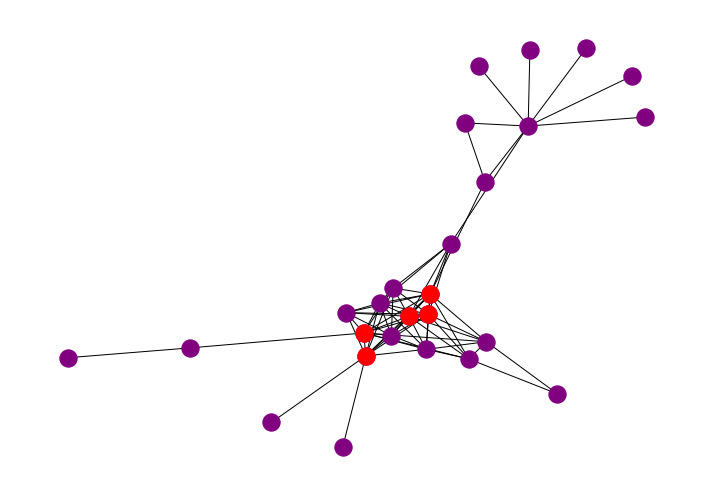

In [ ]:
# visualization of top 5 actors w the greatest degree centrality
plt.figure(figsize =(10, 7)) 
nx.draw_networkx(subgraph, pos, with_labels=False, node_color='purple')  # first draw network + apply color to entire network
nx.draw_networkx_nodes(subgraph, pos, nodelist=['Angel, Jack (I)','McGowan, Mickie','Lynn, Sherry (I)',
                                           'Bergen, Bob', 'Farmer, Bill (I)'], node_color='red')  # then draw the labels + applying color to important nodes
plt.axis('off')
plt.tight_layout();

In [ ]:
nx.closeness_centrality(subgraph)

{'Adler, Charles (I)': 0.2976190476190476,
 'Allwine, Wayne': 0.3472222222222222,
 'Angel, Jack (I)': 0.5813953488372093,
 'Anselmo, Tony': 0.2604166666666667,
 'Bergen, Bob': 0.4716981132075472,
 'Bumpass, Rodger': 0.45454545454545453,
 'Burton, Corey': 0.35714285714285715,
 'Cummings, Jim (I)': 0.4716981132075472,
 'Darling, Jennifer': 0.5,
 'Derryberry, Debi': 0.43859649122807015,
 'Farmer, Bill (I)': 0.5,
 'Harnell, Jess': 0.3246753246753247,
 'Lynn, Sherry (I)': 0.5555555555555556,
 'Mann, Danny (I)': 0.3246753246753247,
 'McGowan, Mickie': 0.5555555555555556,
 'Paulsen, Rob': 0.2976190476190476,
 'Pinney, Patrick': 0.5,
 'Proctor, Phil': 0.5208333333333334,
 'Rabson, Jan': 0.46296296296296297,
 'Ranft, Joe': 0.43103448275862066,
 'Ratzenberger, John': 0.43103448275862066,
 'Soucie, Kath': 0.2976190476190476,
 'Stanton, Andrew (I)': 0.30864197530864196,
 'Taylor, Russi': 0.2976190476190476,
 'Ward, B.J. (II)': 0.2976190476190476,
 'Welker, Frank': 0.4166666666666667}

In [ ]:
# top 5 actors w the greatest closeness centrality
sorted_closeness_centrality = sorted(((value,key) for (key,value) in nx.closeness_centrality(subgraph).items()), reverse=True)

pd.DataFrame(sorted_closeness_centrality, columns = ['Actor', 'Closeness Centrality']).head()

,Actor,Closeness Centrality
0,0.581395,"Angel, Jack (I)"
1,0.555556,"McGowan, Mickie"
2,0.555556,"Lynn, Sherry (I)"
3,0.520833,"Proctor, Phil"
4,0.500000,"Pinney, Patrick"


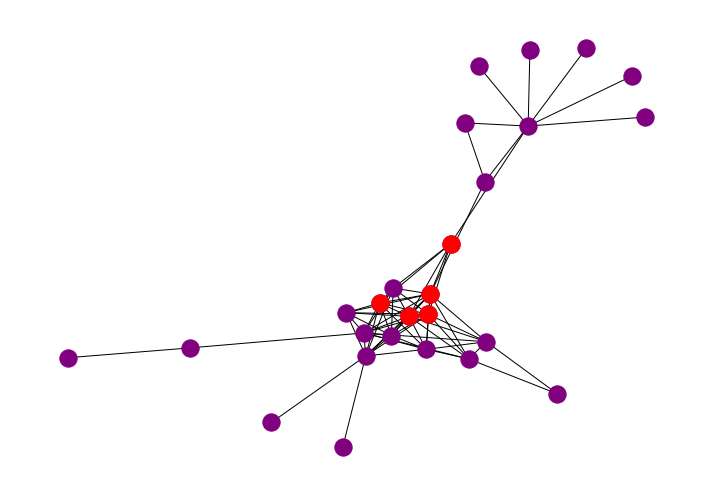

In [ ]:
# visualization of the top 5 actors w the greatest closeness centrality
plt.figure(figsize =(10, 7)) 
nx.draw_networkx(subgraph, pos, with_labels=False, node_color='purple')  
nx.draw_networkx_nodes(subgraph, pos, nodelist=['Angel, Jack (I)','McGowan, Mickie','Lynn, Sherry (I)',
                                           'Proctor, Phil', 'Pinney, Patrick'], node_color='red')  
plt.axis('off')
plt.tight_layout();

In [ ]:
nx.betweenness_centrality(subgraph, normalized=False)

{'Adler, Charles (I)': 0.0,
 'Allwine, Wayne': 24.0,
 'Angel, Jack (I)': 66.12857142857143,
 'Anselmo, Tony': 0.0,
 'Bergen, Bob': 47.42857142857143,
 'Bumpass, Rodger': 0.42857142857142855,
 'Burton, Corey': 0.0,
 'Cummings, Jim (I)': 31.90000000000001,
 'Darling, Jennifer': 8.399999999999999,
 'Derryberry, Debi': 0.0,
 'Farmer, Bill (I)': 50.92857142857142,
 'Harnell, Jess': 0.0,
 'Lynn, Sherry (I)': 21.728571428571428,
 'Mann, Danny (I)': 0.0,
 'McGowan, Mickie': 21.728571428571428,
 'Paulsen, Rob': 0.0,
 'Pinney, Patrick': 87.10000000000001,
 'Proctor, Phil': 11.728571428571426,
 'Rabson, Jan': 3.0,
 'Ranft, Joe': 11.5,
 'Ratzenberger, John': 11.5,
 'Soucie, Kath': 0.0,
 'Stanton, Andrew (I)': 0.0,
 'Taylor, Russi': 0.0,
 'Ward, B.J. (II)': 0.0,
 'Welker, Frank': 113.5}

In [ ]:
# top 5 actors w the greatest betweenness centrality
sorted_betweenness_centrality = sorted(((value,key) for (key,value) in nx.betweenness_centrality(subgraph).items()), reverse=True)

pd.DataFrame(sorted_betweenness_centrality, columns = ['Actor', 'Betweenness Centrality']).head()

,Actor,Betweenness Centrality
0,0.378333,"Welker, Frank"
1,0.290333,"Pinney, Patrick"
2,0.220429,"Angel, Jack (I)"
3,0.169762,"Farmer, Bill (I)"
4,0.158095,"Bergen, Bob"


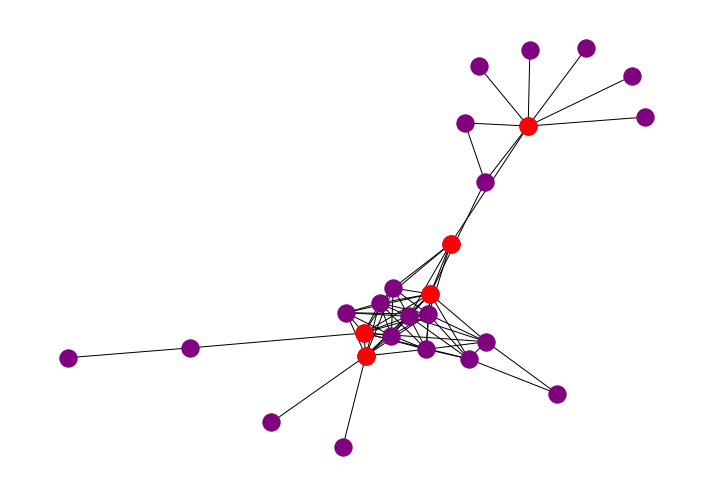

In [ ]:
# visualization of the top 5 actors w the greatest betweenness centrality
plt.figure(figsize =(10, 7)) 
nx.draw_networkx(subgraph, pos, with_labels=False, node_color='purple')  
nx.draw_networkx_nodes(subgraph, pos, nodelist=['Welker, Frank','Pinney, Patrick','Angel, Jack (I)',
                                           'Farmer, Bill (I)', 'Bergen, Bob'], node_color='red')  
plt.axis('off')
plt.tight_layout();

In [ ]:
df = pd.DataFrame(index=subgraph.nodes())
df['degree'] = pd.Series(dict(subgraph.degree()))
df['clustering'] =  round(pd.Series(nx.clustering(subgraph)),2)
df['degree centrality'] = pd.Series(nx.degree_centrality(subgraph))
df['closeness centrality'] = round(pd.Series(nx.closeness_centrality(subgraph)),2)
df['betweenness centrality'] = round(pd.Series(nx.betweenness_centrality(subgraph, normalized=True)),2)

df

,degree,clustering,degree centrality,closeness centrality,betweenness centrality
"Allwine, Wayne",2,0.00,0.08,0.35,0.08
"Ranft, Joe",7,0.76,0.28,0.43,0.04
"Pinney, Patrick",6,0.67,0.24,0.50,0.29
"Stanton, Andrew (I)",2,1.00,0.08,0.31,0.00
"Harnell, Jess",1,0.00,0.04,0.32,0.00
"Derryberry, Debi",7,1.00,0.28,0.44,0.00
"Angel, Jack (I)",13,0.59,0.52,0.58,0.22
"Cummings, Jim (I)",3,0.33,0.12,0.47,0.11
"Ward, B.J. (II)",1,0.00,0.04,0.30,0.00
"Burton, Corey",2,1.00,0.08,0.36,0.00


In [ ]:
list(nx.find_cliques(subgraph))

[['Welker, Frank', 'Burton, Corey', 'Cummings, Jim (I)'],
 ['Welker, Frank', 'Soucie, Kath'],
 ['Welker, Frank', 'Adler, Charles (I)'],
 ['Welker, Frank', 'Taylor, Russi'],
 ['Welker, Frank', 'Paulsen, Rob'],
 ['Welker, Frank', 'Pinney, Patrick'],
 ['Welker, Frank', 'Ward, B.J. (II)'],
 ['Harnell, Jess', 'Bergen, Bob'],
 ['Allwine, Wayne', 'Anselmo, Tony'],
 ['Allwine, Wayne', 'Farmer, Bill (I)'],
 ['Angel, Jack (I)',
  'McGowan, Mickie',
  'Lynn, Sherry (I)',
  'Pinney, Patrick',
  'Darling, Jennifer',
  'Proctor, Phil'],
 ['Angel, Jack (I)',
  'McGowan, Mickie',
  'Lynn, Sherry (I)',
  'Farmer, Bill (I)',
  'Rabson, Jan',
  'Ranft, Joe',
  'Ratzenberger, John'],
 ['Angel, Jack (I)',
  'McGowan, Mickie',
  'Lynn, Sherry (I)',
  'Farmer, Bill (I)',
  'Rabson, Jan',
  'Proctor, Phil',
  'Bumpass, Rodger',
  'Bergen, Bob'],
 ['Angel, Jack (I)',
  'McGowan, Mickie',
  'Lynn, Sherry (I)',
  'Farmer, Bill (I)',
  'Darling, Jennifer',
  'Bumpass, Rodger',
  'Proctor, Phil',
  'Bergen, Bob'],

In [ ]:
biggestClique = []
cliquesList = list(nx.find_cliques(subgraph))
for clique in cliquesList:
    if len(clique)>=6: 
        biggestClique = clique
        print(clique)

['Angel, Jack (I)', 'Lynn, Sherry (I)', 'McGowan, Mickie', 'Pinney, Patrick', 'Proctor, Phil', 'Darling, Jennifer']
['Angel, Jack (I)', 'Lynn, Sherry (I)', 'McGowan, Mickie', 'Farmer, Bill (I)', 'Proctor, Phil', 'Bumpass, Rodger', 'Bergen, Bob', 'Derryberry, Debi']
['Angel, Jack (I)', 'Lynn, Sherry (I)', 'McGowan, Mickie', 'Farmer, Bill (I)', 'Proctor, Phil', 'Bumpass, Rodger', 'Bergen, Bob', 'Darling, Jennifer']
['Angel, Jack (I)', 'Lynn, Sherry (I)', 'McGowan, Mickie', 'Farmer, Bill (I)', 'Proctor, Phil', 'Bumpass, Rodger', 'Bergen, Bob', 'Rabson, Jan']
['Angel, Jack (I)', 'Lynn, Sherry (I)', 'McGowan, Mickie', 'Farmer, Bill (I)', 'Ranft, Joe', 'Rabson, Jan', 'Ratzenberger, John']


In [ ]:
edge_cliquesList = [edge for edge in subgraph.edges(data=True) if (edge[0] in biggestClique) and (edge[1] in biggestClique)]
edge_cliquesList

[('Ranft, Joe', 'Farmer, Bill (I)', {'weight': 5}),
 ('Ranft, Joe', 'Angel, Jack (I)', {'weight': 5}),
 ('Ranft, Joe', 'Rabson, Jan', {'weight': 5}),
 ('Ranft, Joe', 'Ratzenberger, John', {'weight': 6}),
 ('Ranft, Joe', 'Lynn, Sherry (I)', {'weight': 5}),
 ('Ranft, Joe', 'McGowan, Mickie', {'weight': 5}),
 ('Angel, Jack (I)', 'Lynn, Sherry (I)', {'weight': 10}),
 ('Angel, Jack (I)', 'McGowan, Mickie', {'weight': 11}),
 ('Angel, Jack (I)', 'Farmer, Bill (I)', {'weight': 7}),
 ('Angel, Jack (I)', 'Rabson, Jan', {'weight': 6}),
 ('Angel, Jack (I)', 'Ratzenberger, John', {'weight': 5}),
 ('Lynn, Sherry (I)', 'McGowan, Mickie', {'weight': 11}),
 ('Lynn, Sherry (I)', 'Farmer, Bill (I)', {'weight': 8}),
 ('Lynn, Sherry (I)', 'Rabson, Jan', {'weight': 6}),
 ('Lynn, Sherry (I)', 'Ratzenberger, John', {'weight': 5}),
 ('Farmer, Bill (I)', 'McGowan, Mickie', {'weight': 8}),
 ('Farmer, Bill (I)', 'Rabson, Jan', {'weight': 6}),
 ('Farmer, Bill (I)', 'Ratzenberger, John', {'weight': 5}),
 ('Rabson, 

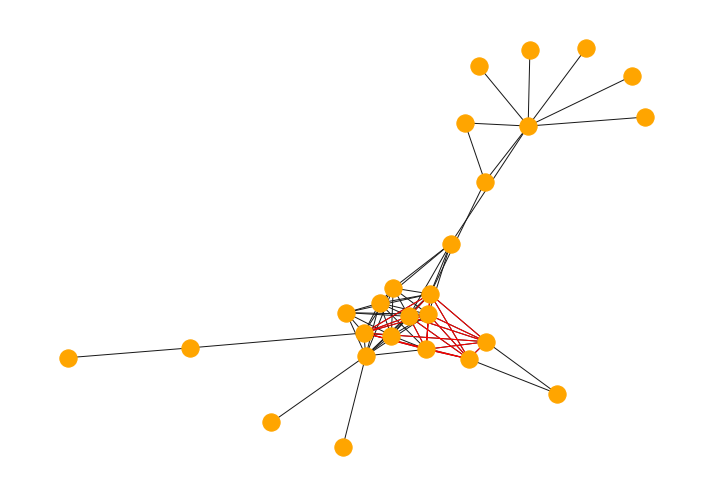

In [ ]:
# represents the largest clique in the network
plt.figure(figsize =(10, 7)) 
nx.draw_networkx(subgraph, pos, with_labels=False, node_color='orange', edge_color='.1')  # edge color means how thin you want the edges to be
nx.draw_networkx_edges(subgraph, pos, edgelist=edge_cliquesList, edge_color='r')    # applying color on the edges in the list we generated in the cell above

plt.axis('off')
plt.tight_layout();

In [ ]:
# can code weight in (instead of degrees, use weight; ie. degree = 4, so weight = 4)
# can define network however we like 
# want to see our creativity

Each node corresponds with a single actor, while the edges that connect the actors to each other shows that those two actors have starred in the same movie together. The weight, otherwise known as the thickness of the edges, depict how many movies each actor has starred in together. Meaning the thicker the line, the more movies they've starred in together.

In order to create a smaller network, I decided to look only at the actors who have starred in at least 5 movies with at least one other actor. Thus, the network that we are looking at is comprised only of actors who are likely (1) quite popular, so they act in a lot of movies, and possibly wind up starring with many people due to the sheer number of movies they've been a part of, or (2) they get along well with at least one actor in the network, so they are asked to act together since they have great synergy. After starring in enough movies with the same people, it's likely not a coincidence anymore, unless these actors are all A list actors, then there are only so many actors to choose from. As a result, our network is relatively small, with only a total of 26 actors, and a total of 74 connections between the actors.

Within the network, on average, each actor has acted with 5, almost 6 other actors.

I drew the network (named "subgraph"), and the more actors a specific person has acted with, the darker the purple is for their node color. The more times they've starred in the same movie as another actor (ie. Actor A and Actor B), the thicker the connection between them is. For example, if Actor A starred in 6 movies with Actor B, and Actor B has starred in 9 movies with Actor C, Actor B should have a thicker edge with Actor C than Actor A because Actor B has been in more movies with Actor C than with Actor A.

The "Degree Distribution" graph is a visualization of how many people each actor has acted with. The degree count (x-axis) refers to how many other unique actors someone has starred with. It's important to note that this graph does not mention anything about how many times they've acted in the same movies as a specific actor, only how many people that specific actor has acted with. The frequency (y-axis) counts how many actors each actor has played in movies with. 
For example, according to the "Degree Distribution" graph, there are a total of 8 actors who are connected to only one other person in the network. 

The "Probability Distribution" refers to how likely it is to pick an actor in the network with a specific number of connections to the other actors. The probability distribution is reliant on the actors and how many people each actor has acted with. In a way, considering the degree distribution is useful. Since we noticed that there were the most actors connected to only one other actor in the network, it makes sense that it's most likely to randomly pick an actor in this network who has starred in movies with only one other actor.

I found that the network is not bipartite, meaning the data does not contain data of different natures. While it's true that there are movie names and actors, but the movies are associated with the actors. Additionally, the movies helped us find how the actors are connected to each other, but we didn't plot the movies with the actors, meaning the network does not have nodes of different backgrounds.

Next, I looked at the "shortest path," which is the fastest way to find each of the actors in the network. This can refer to finding that specific actor by looking up a certain movie or finding the actor(s) they've starred in the same movies with in order to find the actor you were looking for.

The "average shortest path length" refers to about how many movies or people you have to look through before finding the person you were looking for. In this case, it's roughly 2-3 movies/actors.

As an example of finding the fastest way to find the other actors in the network through a specified actor, I used Frank Welker to have quantitative values to refer to. The smaller the number, the fewer movie casts, movie titles, or actors someone has to sift through. For simplicity's sake, I will be referring to the list of "movie casts, movie titles, or actors" only as "movie casts" after this so it won't interrupt the flow of the sentences or take away from my analysis of my findings.

I found that the two actors in this network who are the least connected to each other and don't have direct connections to each other, only connections through people they've worked with previously, are six connections away from each other. I interpret this as starting from one actor and needing to look through six different movie casts before finding the other actor. This number is known as the "diameter," which is the longest path in the network, meaning that's the most time-consuming and least efficient way to find one actor through another.

Next, I found the people who were least associated with each specific actor. Like the previous paragraph, I think the numbers associated with each actor refers to the maximum number of movie casts someone would have to look through before finding the actor they're looking for in this network. These numbers are known as the "eccentricity," which finds the actor(s) least connected to the actor you're looking at.

Next, I looked at the radius, which is opposite of the diameter, which is the fastest and most efficient way to find an actor through the others. Since the radius value is 3, it takes looking through at least 3 movie casts in the network to find the person that you're looking for.

The periphery identifies the actors who are the least closely associated with the others, meaning it identifies the actors who have the diameter value and lists their names. These people are the hardest to find in the network because they either haven't acted in as many movies as everyone else in the network, or the actors (or the agency they're a part of) that they're more affiliated with did not fulfill the requirements that I had (which was for each actor to have been in at least 5 movies with someone, and for them to be connected to at least one other person who fulfills that requirement).

The center refers to the actors with the shortest paths, meaning someone who's looking up actors won't have to look through as many movie casts to find the actor(s) they're looking for if they use one of these 5 actors (Angel, Jack (I), Darling, Jennifer, Proctor, Phil,
McGowan, Mickie, or Lynn, Sherry (I)) as the starting point.


Clustering refers to how connected the actors that a specific actor has acted with have starred in movies with each other. The clustering coefficient is on a scale of 0 to 1, where 0 means none of the actors they've acted with have acted together, and 1 means all of the actors they've acted with have acted together.

The average clustering coefficient of the network is roughly 47%, meaning there's almost a 1/2 chance that an actor someone has acted with is an actor they've also worked with before.


The higher an actor's degree centrality is, the more movies they've acted in with different/unique actors. Visually, the people with higher degree centralities have more edges/connections to other actors. Angel, Jack (I), McGowan, Mickie, Lynn, Sherry (I), Bergen, Bob, and Farmer, Bill (I) are the top five actors in the network who have acted with the most actors. Degree centrality, however, does not consider the weight of the edges, only the sheer number of actors each individual actor has starred in a movie with.

Closeness centrality refers to how quickly you can find another actor by either (1) looking an actor up on the Internet and eventually finding the actor you were looking for in the recommended list of actors, or (2) how many actors within the network you'd have to contact before finding the actor you're looking for. The largest the closeness centrality value is, the fewer actors you'd have to reach out to/look up to find the actor that you're looking for, meaning that these actors have the shortest overall distance from all the other actors. In the context of this network, "distance" refers to how many movie casts you'd have to look through to find the specific actor you're looking for. Angel, Jack (I), McGowan, Mickie, Lynn, Sherry (I), Proctor, Phil, and Pinney, Patrick are the top five actors in the network who are the best people to contact if you're trying to find a specific actor in the network.

Betweenness centrality refers to the actors who have to be passed through to get to the other actors, however betweenness centrality doesn't quite work with people. Instead, it works better for locations, such as cities or train stations, because places that have higher betweenness centralities are the places that MUST be passed through to reach other locations. Welker, Frank, Pinney, Patrick,Angel, Jack (I), Farmer, Bill (I), and Bergen, Bob are deemed the most crucial actors who have to be passed through to get to the other actors, but again, it doesn't make much sense in terms of people.

Degree centrality, closeness centrality, and betweenness centrality are all measures that are crucial to node importance. Based on all three categories, the people who are likely the most "important" are the people who have appeared in more of the three categories (although betweenness isn't as relevant for people, as stated previously). McGowan, Mickie, Lynn, Sherry (I), and Angel, Jack (I) are the most important because their names appeared in the top 5 most important actors for both degree and closeness centrality.

I found all the cliques in this network. Cliques refer to parts of the network where all of the actors have starred in movies with each other.

Finally, I highlighted the largest clique in the network by changing the color of their edges to make it extra clear that all of the actors have acted in at least one movie with each other. 

